In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import pandas as pd
import numpy as np
import scipy as sp
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
filepath = '../Updated signal features/npz files/'
filepath = '../bkg_npz_files/'
#METx, METy,  lep_p_E, lep_p_px, lep_p_py, lep_p_pz, lep_m_E , lep_m_px, lep_m_py, lep_m_pz

In [5]:
def inv_mass_2(E, px, py, pz):
    P2 = px**2 + py**2 + pz**2
    return (E**2 - P2)
    
def load_evt(file, label, index):
    if index == None:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', f[label].shape[0])
        return f[label]
    else:
        f = np.load(filepath+file)
        print('Loaded '+label+' from '+file+' collection ',f.files, 'rows: ', len(index))
        return f[label][index]
        
def load_p4(file,labels,index,unit):
    labels = ['E','px','py','pz'] if labels == None else labels
    if index == None:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ]*unit
        DF[labels[1]] = f['px']*unit
        DF[labels[2]] = f['py']*unit
        DF[labels[3]] = f['pz']*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', DF.iloc[:,0].shape[0])
        return DF
    else:
        DF = pd.DataFrame(columns= labels)
        f = np.load(filepath+file)
        DF[labels[0]] = f['E' ][index]*unit
        DF[labels[1]] = f['px'][index]*unit
        DF[labels[2]] = f['py'][index]*unit
        DF[labels[3]] = f['pz'][index]*unit
        print('Loaded E, px, py, pz from '+file+' collection ',f.files, 'rows: ', len(index))
        return DF

In [3]:
f= np.load('cut_id_bool.npz')
f.files
for i in f.files:
    print('cut '+i,':\n\t',np.unique(f[i],return_counts=True))
all_cut_index = f['lep_PT'] & f['diLep_mass'] & f['MET']# & f['diLep_PT'] & f['diLep_dPhi'] & f['diLep_MET_dPhi'] 
print('\n\t',np.unique(all_cut_index,return_counts=True))
#cut_pre = cut_pre_pt_lead & cut_pre_pt_sub & cut_pre_dilep_m & cut_pre_pt_miss
np.unique(all_cut_index,return_counts=True)

cut lep_eta :
	 (array([False,  True]), array([ 592355, 2336507]))
cut lep_PT :
	 (array([False,  True]), array([1322264, 1606598]))
cut MET :
	 (array([False,  True]), array([ 284319, 2644543]))
cut diLep_mass :
	 (array([False,  True]), array([ 534836, 2394026]))
cut diLep_PT :
	 (array([False,  True]), array([ 631011, 2297851]))
cut diLep_dPhi :
	 (array([False,  True]), array([ 792636, 2136226]))
cut diLep_MET_dPhi :
	 (array([False,  True]), array([ 520347, 2408515]))

	 (array([False,  True]), array([1790709, 1138153]))


(array([False,  True]), array([1790709, 1138153]))

In [6]:
%%time

GeV = 0.001
LeptonP = load_p4('LeptonP.npz', ['lp_E','lp_px','lp_py','lp_pz'] , all_cut_index.tolist(), GeV)
LeptonM = load_p4('LeptonM.npz', ['lm_E','lm_px','lm_py','lm_pz'], all_cut_index.tolist(), GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(['px','py']):
    MET['MET_'+j] = load_evt('MET.npz',j,all_cut_index.tolist())*GeV
#Higgs = mf.load_particle('Higgs.npz', None, GeV)
#WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
#WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
#diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = load_p4('LpNu.npz', ['np_E','np_px','np_py','np_pz'] , all_cut_index.tolist(), GeV)
NeutrinoM = load_p4('LmNu.npz', ['nm_E','nm_px','nm_py','nm_pz'] , all_cut_index.tolist(), GeV)
diNeutrino = pd.DataFrame()
diNeutrino['diNu_E'  ] = NeutrinoP['np_E' ]+NeutrinoM['nm_E' ]
diNeutrino['diNu_px' ] = NeutrinoP['np_px']+NeutrinoM['nm_px']
diNeutrino['diNu_py' ] = NeutrinoP['np_py']+NeutrinoM['nm_py']
diNeutrino['diNu_pz' ] = NeutrinoP['np_pz']+NeutrinoM['nm_pz']
diNeutrino['diNu_m2' ] = inv_mass_2(diNeutrino['diNu_E'],diNeutrino['diNu_px'],diNeutrino['diNu_py'],diNeutrino['diNu_pz'])
print('>>>>>>>>>> DONE <<<<<<<<<<')

Loaded E, px, py, pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E, px, py, pz from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded py from MET.npz collection  ['pt', 'px', 'py', 'phi'] rows:  2928862
Loaded E, px, py, pz from LpNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E, px, py, pz from LmNu.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
>>>>>>>>>> DONE <<<<<<<<<<
CPU times: user 4.08 s, sys: 72.5 ms, total: 4.16 s
Wall time: 4.07 s


In [7]:
print(LeptonP.columns)
print(LeptonM.columns)
print(NeutrinoP.columns)
print(NeutrinoM.columns)
print(MET.columns)
Dataset = pd.merge(LeptonP , LeptonM, how='outer', left_index=True, right_index=True)
Dataset = pd.merge(MET     , Dataset, how='outer', left_index=True, right_index=True)
Dataset = pd.merge(diNeutrino['diNu_pz'],Dataset, how='outer', left_index=True, right_index=True)
Dataset.describe()

Index(['lp_E', 'lp_px', 'lp_py', 'lp_pz'], dtype='object')
Index(['lm_E', 'lm_px', 'lm_py', 'lm_pz'], dtype='object')
Index(['np_E', 'np_px', 'np_py', 'np_pz'], dtype='object')
Index(['nm_E', 'nm_px', 'nm_py', 'nm_pz'], dtype='object')
Index(['MET_px', 'MET_py'], dtype='object')


,diNu_pz,MET_px,MET_py,lp_E,lp_px,lp_py,lp_pz,lm_E,lm_px,lm_py,lm_pz
count,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06
mean,2.996869e-01,-2.023163e-02,1.418727e-03,9.671567e+01,-1.753556e-02,-1.485957e-03,2.415165e-01,9.652489e+01,-1.322935e-02,3.101434e-02,9.857322e-02
std,2.556336e+02,4.001343e+01,4.004542e+01,1.239836e+02,2.654900e+01,2.652480e+01,1.527003e+02,1.232823e+02,2.654063e+01,2.651570e+01,1.520134e+02
min,-3.724896e+03,-7.011635e+02,-1.011480e+03,1.500272e+01,-6.775440e+02,-5.162718e+02,-2.449836e+03,1.500439e+01,-5.988651e+02,-3.947965e+02,-2.445477e+03
25%,-7.446479e+01,-2.929437e+01,-2.926953e+01,3.372342e+01,-1.803471e+01,-1.800634e+01,-4.054277e+01,3.368389e+01,-1.800871e+01,-1.797780e+01,-4.050212e+01
50%,1.679062e-01,-1.701562e-02,-4.818481e-03,5.476153e+01,-1.251064e-02,1.213970e-02,5.788476e-02,5.465194e+01,-1.105983e-02,4.534390e-02,6.360454e-02
75%,7.493925e+01,2.924418e+01,2.923864e+01,1.063875e+02,1.800158e+01,1.800916e+01,4.091857e+01,1.061252e+02,1.798095e+01,1.805413e+01,4.072817e+01
max,3.760952e+03,7.917826e+02,8.692037e+02,2.838006e+03,5.393957e+02,5.822423e+02,2.833088e+03,2.675194e+03,8.355693e+02,5.790039e+02,2.674680e+03


In [8]:
LeptonM.describe()

,lm_E,lm_px,lm_py,lm_pz
count,1.138153e+06,1.138153e+06,1.138153e+06,1.138153e+06
mean,9.652489e+01,-1.322935e-02,3.101434e-02,9.857322e-02
std,1.232823e+02,2.654063e+01,2.651570e+01,1.520134e+02
min,1.500439e+01,-5.988651e+02,-3.947965e+02,-2.445477e+03
25%,3.368389e+01,-1.800871e+01,-1.797780e+01,-4.050212e+01
50%,5.465194e+01,-1.105983e-02,4.534390e-02,6.360454e-02
75%,1.061252e+02,1.798095e+01,1.805413e+01,4.072817e+01
max,2.675194e+03,8.355693e+02,5.790039e+02,2.674680e+03


In [10]:
N_evts=100000
sample_evt = np.random.choice(len(LeptonM['lm_E']),N_evts,replace=False)
RS_x= RobustScaler()
MS_x = MinMaxScaler()
input = RS_x.fit_transform(Dataset.iloc[sample_evt,::])
input = MS_x.fit_transform(input)
#RS_y = RobustScaler()
#MS_y = MinMaxScaler()
#label = RS_x.fit_transform(Dataset.loc[sample_evt,'diNu_pz'].to_numpy().reshape(-1, 1))
#label = MS_x.fit_transform(label)

In [12]:
model = tf.keras.models.load_model('DNN_pz.h5')
model.summary()
pz_pred = model.predict(input[::,1::])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                176       
                                                                 
 dense_11 (Dense)            (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 4)                 68        
                                                                 
 dense_13 (Dense)            (None, 4)                 20  

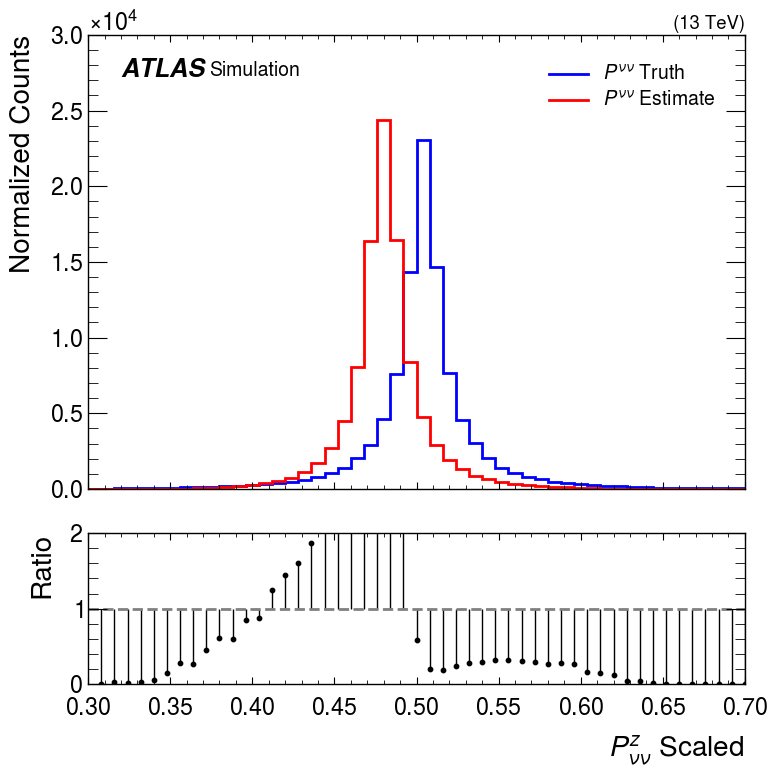

In [14]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(8,8),gridspec_kw={'height_ratios': [6,2]},sharex=True,tight_layout=True)
ax = ax.flatten()
hep.atlas.label(ax=ax[0],loc=1)
truth_bar, truth_bin = np.histogram(input[::,0],bins=50,range=[0.3,0.7])#,histtype='step',label = 'MET')
est_bar  ,   est_bin = np.histogram(pz_pred,bins=50,range=[0.3,0.7])#,histtype='step',label = 'MET')
hep.histplot(truth_bar,truth_bin,label=r'$P^{\nu\nu}$ Truth',ax=ax[0],lw=2,color='b')
hep.histplot(est_bar  ,truth_bin,label=r'$P^{\nu\nu}$ Estimate',ax=ax[0],lw=2,color='r')
ax[0].set_xlim([0.3,0.7])
ax[0].legend()
ax[0].set_ylabel("Normalized Counts")
#ax[1].stairs((est_bar-truth_bar)/truth_bar,truth_bin,edgecolor='k')#,align='edge')
ax[1].vlines(truth_bin[1::],1,(est_bar)/truth_bar,color='k',lw=1)#,align='edge')
ax[1].scatter(truth_bin[1::],(est_bar)/truth_bar,color='k',lw=1,s=10,label='')#,align='edge')
ax[1].set_ylim([0,2])
ax[1].axhline(1,c='grey',ls='dashed')
ax[1].set_xlabel(r"$P^z_{\nu\nu}$ Scaled")
ax[1].set_ylabel("Ratio")
ax[1].tick_params(axis='x',pad=9)
plt.show()